# Credit Card Fraud Detection

Overview

1. Data Exploration
2. Resampling for Imbalanced Data
3. Logistic Regression
4. Decision Tree Classifier
5. Random Forest Classifier
6. Voting Classifier
7. K-means Clustering
8. BDS
9. Autoencoder Neural Networks

### 1. Data Analysis

In [1]:
# Import packages

%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
sns.set(style='whitegrid')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# Reviewing 5 transactions that were chosen randomly

df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282614,171022.0,-0.372061,1.032897,-0.986787,-0.227241,0.776753,-0.948557,0.452299,0.267329,-0.436515,...,0.393973,1.081508,-0.093005,-0.469723,-0.352815,-0.157339,-0.102716,0.040507,1.22,0
194542,130638.0,-1.211093,0.315449,2.006998,0.188692,-0.904556,-0.195202,-0.385284,0.663506,0.356213,...,0.164692,0.180145,-0.144656,0.007128,0.251691,-0.110506,-0.030427,-0.028278,62.85,0
85980,61028.0,-0.162717,-0.413915,0.955835,-2.008661,-0.816780,-0.376908,0.261608,-0.053868,-0.845128,...,-0.126412,-0.127613,0.121185,-0.433193,-0.389089,1.375730,-0.074849,0.026554,113.64,0
2019,1559.0,1.181015,0.183850,0.699030,0.700274,-0.595810,-0.839532,-0.038642,-0.073295,0.078477,...,-0.200933,-0.571252,0.238454,0.587858,0.057450,0.092996,-0.014880,0.019808,0.89,0
73479,55153.0,-0.806127,1.191230,2.097460,1.320051,0.480719,-0.069386,0.777809,0.067535,-1.186226,...,0.193235,0.419989,-0.454772,-0.121790,0.635479,0.121720,0.010920,0.061392,16.43,0


In [6]:
# Checking how common are fraudulent transactions

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
fnf = df["Class"].value_counts()

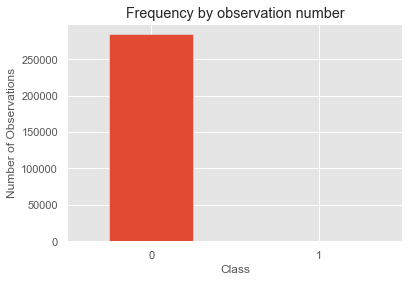

In [9]:
plt.xlabel("Class")
plt.ylabel("Number of Observations")
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)

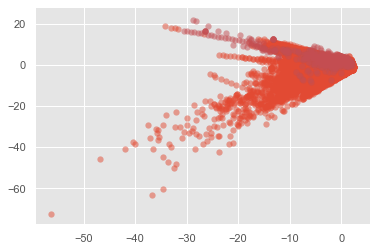

In [10]:
# Fraud vs. non-fraud cases

plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

### Distribution of Time and Amount

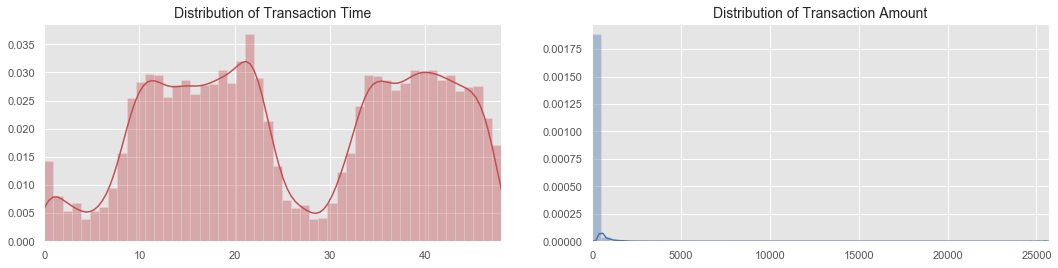

In [11]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

Most transactions happended in day time.Mean of transaction amount is 88 USD and 75% quatile is 77 USD.

### Divide Dataset into Two Datasets and Summarize

In [12]:
# Seperate total data into non-fraud and fraud cases

df_nonfraud = df[df.Class == 0] 
df_fraud = df[df.Class == 1]

Compare the number of transactions in two separate datasets

In [13]:
# Summarize statistics and see differences between fraud and normal transactions

print(df_nonfraud.Amount.describe())
print('_'*25)
print(df_fraud.Amount.describe())

# Import the module

from scipy import stats
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
_________________________
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
F: 9.033344712018891
p: 0.0026512206498171095


The mean transaction amout among fraud cases is 122 USD, and is 88 among non-fraud cases. And the difference is statistically significant.

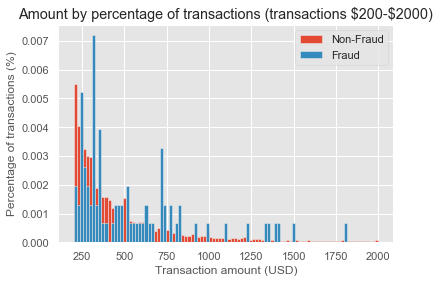

In [14]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Fraud transaction happen more frequently. It would be hard to differentiate fraud from normal transactions by transaction amount alone.

Transaction Hour

Let's look at the transaction percentage from day 0 to the next day.

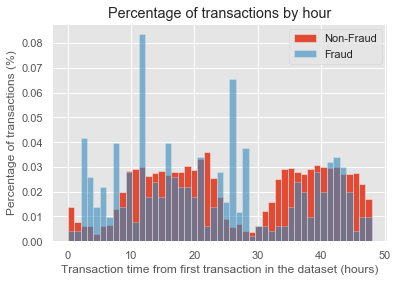

In [15]:
# Plot of transactions in 48 hours

bins = np.linspace(0, 48, 48) #48 hours
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

It seems fraud tends to occur at higher rates during the night.

Transaction Amount vs. Hour

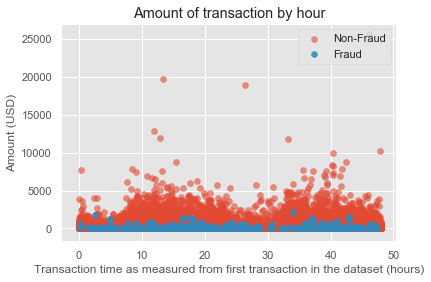

In [16]:
# Plot of transactions in 48 hours

plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

### Feature Scaling

In [17]:
# Scale "Time" and "Amount"

from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"

df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### Correlation Matrices

Text(0.5, 1, 'Imbalanced Correlation Matrix \n')

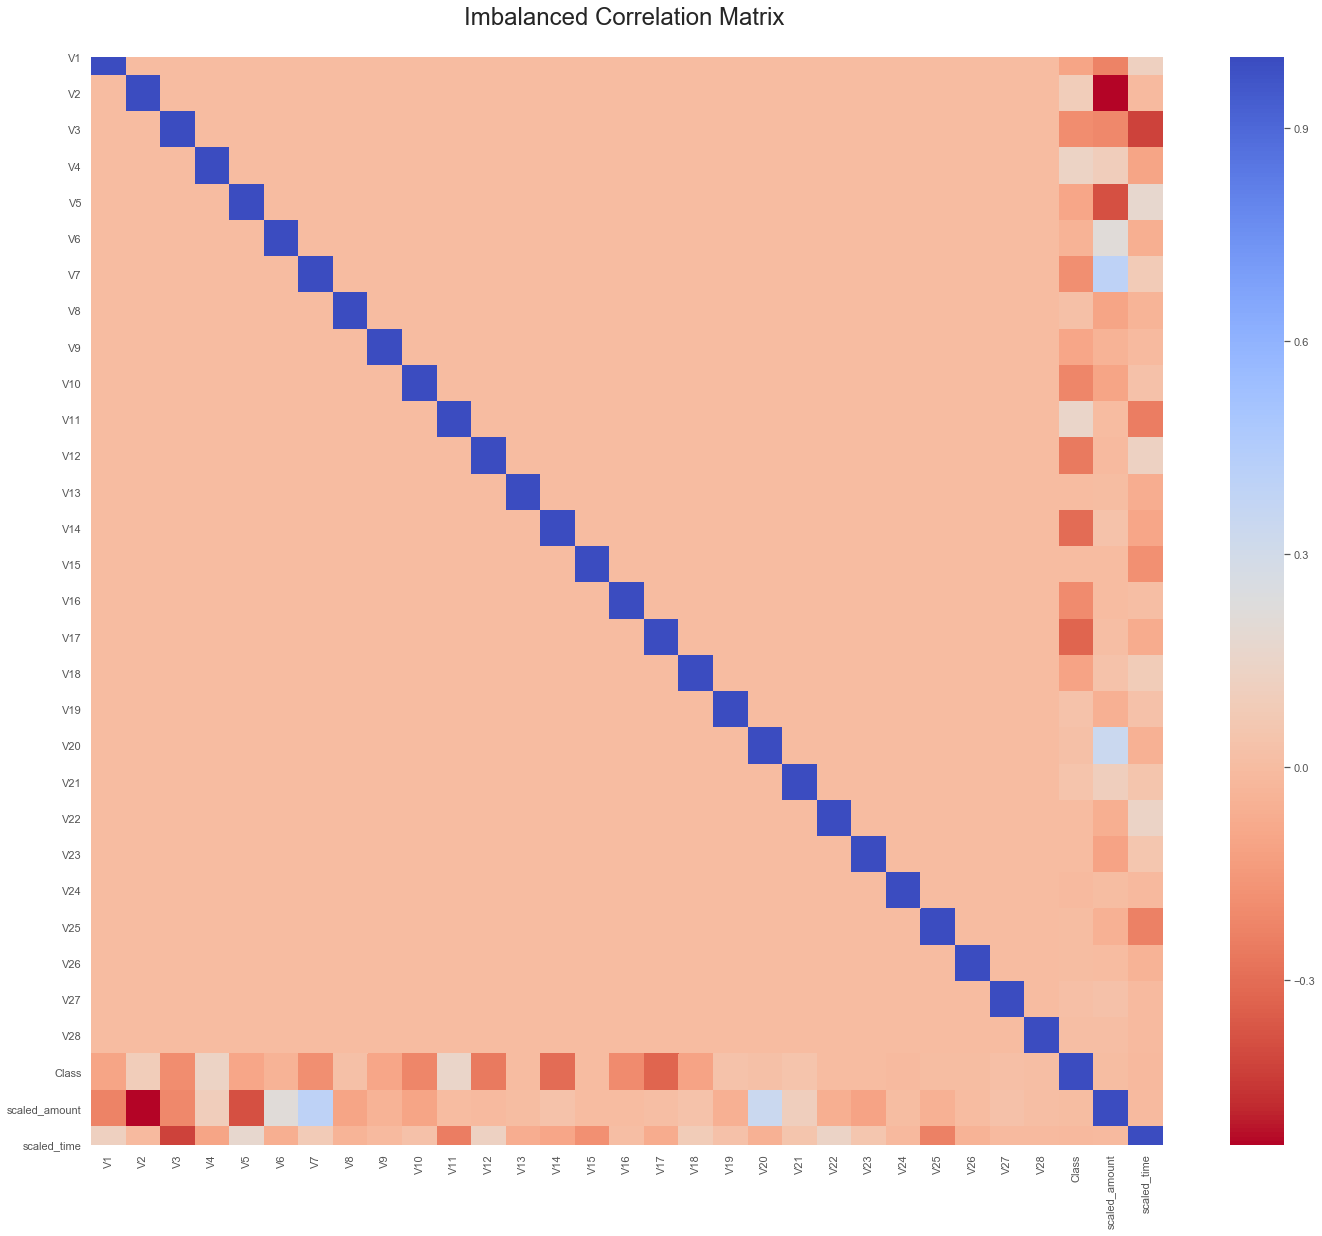

In [18]:
# Calculate pearson correlation coefficience

corr = df_scaled.corr() 

# Plot heatmap of correlation

f, ax = plt.subplots(1, 1, figsize=(24,20))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Imbalanced Correlation Matrix \n", fontsize=24)

## 2. Resampling for Imbalanced Data

### Extract features from our scaled dataset "df_scaled"

In [19]:
# Define the prep_data function to extrac features

def prep_data(df):
    X = df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function 

X, y = prep_data(df_scaled)

### Resample data with RUS, ROS and SMOTE

In [20]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-pack

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the resampling method

undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE(kind='regular',random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

# resample the training data

X_undersam, y_undersam = undersam.fit_sample(X_train,y_train)
X_oversam, y_oversam = oversam.fit_sample(X_train,y_train)
X_smote, y_smote = smote.fit_sample(X_train,y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_sample(X_train,y_train)

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 3. Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data

model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions

y_predicted = model.predict(X_test)

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Evaluation

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create true and false positive rates

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 

probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 

average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function

def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

ROC AUC Score: 0.9697298212100447


In [24]:
# Define a precision_recall_curve function

def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   56    91]]


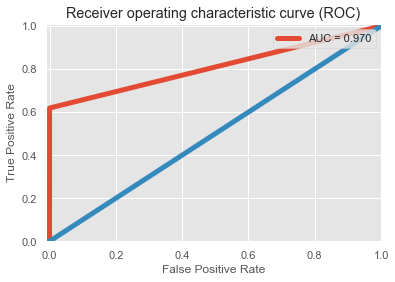

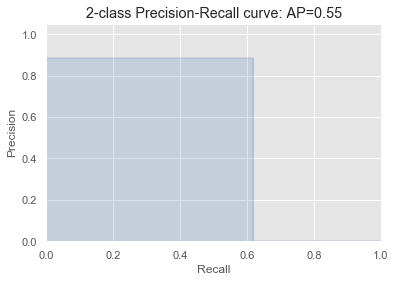

In [25]:
# Print the classifcation report and confusion matrix

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

# Plot the roc curve 

plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve

plot_pr_curve(recall, precision, average_precision)

Accuracy score= 99.92% which is higher than the baseline 99.83%.
Precision = 91/(12+91) = 0.88. The rate of true positive in all positive cases.
Recall = 91/ (56+91) = 0.62. The rate of true positive in all true cases.
F1-score = 0.73
False positives cases = 12.

## Logistic Regression with Resampled Data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [27]:
# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Resample your training data

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(kind='regular',random_state=5)
blsmote = BorderlineSMOTE(kind='borderline-2',random_state=5)

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_sample(X_train,y_train)

# Fit a logistic regression model to our data

rus_model = LogisticRegression().fit(X_train_rus, y_train_rus)
ros_model = LogisticRegression().fit(X_train_ros, y_train_ros)
smote_model = LogisticRegression().fit(X_train_smote, y_train_smote)
blsmote_model = LogisticRegression().fit(X_train_blsmote, y_train_blsmote)

y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs'

In [28]:
print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_blsmote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_blsmote))
print('*'*25)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     85296
         1.0       0.03      0.93      0.06       147

    accuracy                           0.95     85443
   macro avg       0.52      0.94      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Confusion matrix:
 [[80959  4337]
 [   10   137]]
*************************
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.07      0.92      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83373  1923]
 [   12   135]]
*************************
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0    

### Logistic Regression with sampled Data using Pipeline

In [29]:
# Import the pipeline module we need for this from imblearn

from imblearn.pipeline import Pipeline 

# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = LogisticRegression() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 

pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_predicted))

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     85296
         1.0       0.09      0.86      0.17       147

    accuracy                           0.98     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[84031  1265]
 [   20   127]]


As you can see, with the BorderlineSMOTE resampling method, we can get the best f1-score 0.15 compared with other 3 reampling methods. Not in all cases does resampling necessarily lead to better results.

## 4. Decision Tree Classifier

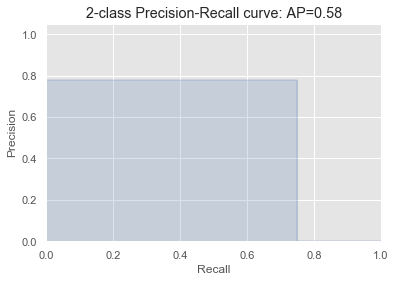

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.78      0.75      0.76       147

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85265    31]
 [   37   110]]


In [30]:
# Import the decision tree model from sklearn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions

y_predicted = model.predict(X_test)

# Calculate average precision 

average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 

precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff

plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Precision = 113/(113+25) = 0.82. The rate of true positive in all positive cases.
Recall = 113/ (113+34) = 0.77. The rate of true positive in all true cases.
F1-score = 0.79 False positives cases = 31.

### Decision Tree Classifier with SMOTE Data

In [31]:
# Import the pipeline module we need for this from imblearn

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = DecisionTreeClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model

pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 

pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.51      0.73      0.60       147

    accuracy                           1.00     85443
   macro avg       0.75      0.86      0.80     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85193   103]
 [   40   107]]


Precision = 0.63. The rate of true positive in all positive cases.
Recall = 0.71. The rate of true positive in all true cases.
F1-score = 0.66
False positives cases = 62.

## 5. Random Forest Classifier

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


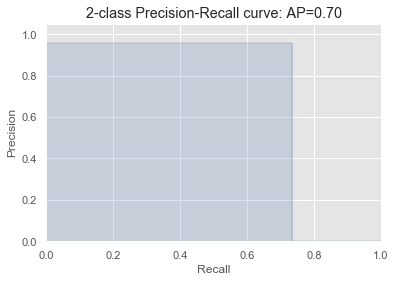

0.9994850368081645
AUC ROC score:  0.9214466198221927
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.96      0.73      0.83       147

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85291     5]
 [   39   108]]


In [32]:
# Import the Random Forest Classifier model from sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data

model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

# Obtain model predictions

y_predicted = model.predict(X_test)

# Predict probabilities

probs = model.predict_proba(X_test)

# Calculate average precision 

average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 

precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff

plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix

print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))

Accuracy score = Precision = 0.95. The rate of true positive in all positive cases.
Recall = 0.73. The rate of true positive in all true cases.
F1-score = 0.83 False positives cases = 6, which is much better.

### Random Forest Classifier with SMOTE Data Catch Fraud

In [33]:
# Import the pipeline module we need for this from imblearn

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) 
model = RandomForestClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model

pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 

pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Predict probabilities

probs = model.predict_proba(X_test)

print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9994616293903538
AUC ROC score:  0.94127445106724
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.89      0.78      0.83       147

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85282    14]
 [   32   115]]


### Random Forest Classifier Model adjustments

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


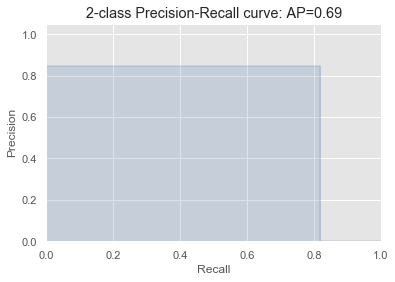

auc roc score:  0.972386276776702
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.85      0.82      0.83       147

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85274    22]
 [   27   120]]


In [34]:
# Import the Random Forest Classifier model from sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the model with balanced subsample

model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)

# Fit your training model to your training set

model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 

y_predicted = model.predict(X_test)

# Calculate probs

probs = model.predict_proba(X_test)

# Calculate average precision 

average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 

precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff

plot_pr_curve(recall, precision, average_precision)

# Print the roc auc score, the classification report and confusion matrix

print("auc roc score: ", roc_auc_score(y_test, probs[:,1]))
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n', confusion_matrix(y_test, y_predicted))

The model results don't improve drastically.

GridSearchCV to find optimal parameters for Random Forest Classifier

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter sets to test

param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use

model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model

CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters

CV_model.fit(X_train, y_train)
CV_model.best_params_

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

### Model results using GridSearchCV

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


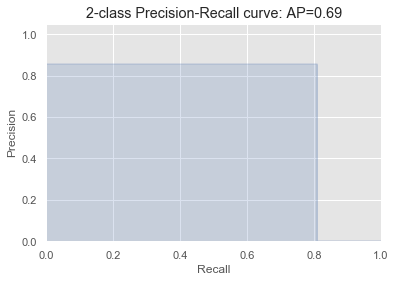

roc_auc_score: 0.9783260964299432
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.86      0.81      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
 [[85276    20]
 [   28   119]]


In [36]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Build a RandomForestClassifier using the GridSearchCV parameters

model = RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_leaf = 10,
                               max_depth = 8,
                               n_jobs = -1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results

model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

# Calculate average precision 

average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 

precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff

plot_pr_curve(recall, precision, average_precision)

# Print the roc_auc_score,Classifcation report and Confusin matrix

probs = model.predict_proba(X_test)
print('roc_auc_score:', roc_auc_score(y_test,probs[:,1]))
print('Classification report:\n',classification_report(y_test,y_predicted))
print('Confusion_matrix:\n',confusion_matrix(y_test,y_predicted))

The results of this model just does not perform better.

## 6. Voting Classifier

In [37]:
# Import modules 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the three classifiers to use in the ensemble

clf1 = LogisticRegression(class_weight={0:1,1:15},random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1,1:12},
                              criterion='entropy',
                              max_depth=10,
                              max_features='auto',
                              min_samples_leaf=10, 
                              n_estimators=20,
                              n_jobs=-1,
                              random_state=5)
clf3 = DecisionTreeClassifier(class_weight='balanced',random_state=5)

# Combine the classifiers in the ensemble model

ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Fit the model to your training data and get the predicted results

ensemble_model.fit(X_train,y_train)
y_predicted = ensemble_model.predict(X_test)

# print roc auc score , Classification report and Confusion matrix of the model

print('Classifier report:\n',classification_report(y_test,y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_test,y_predicted))

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifier report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.85      0.82      0.83       147

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85274    22]
 [   27   120]]


By combining the classifiers, we can take the best of multiple models.
By combining these together we manage to improve performance.

/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maria.doda/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


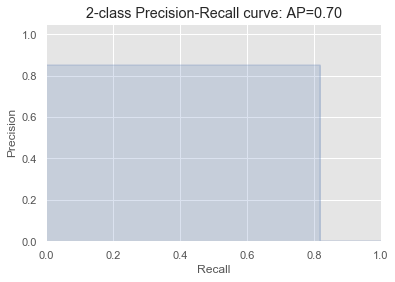

Classifier report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.85      0.82      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85275    21]
 [   27   120]]


In [38]:
# Adjust weights within the Voting Classifier

# Define the ensemble model

ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                                  voting='soft', 
                                  weights=[1, 4, 1], 
                                  flatten_transform=True)

# Fit the model to your training data and get the predicted results

ensemble_model.fit(X_train,y_train)
y_predicted = ensemble_model.predict(X_test)

# Calculate average precision 

average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 

precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff

plot_pr_curve(recall, precision, average_precision)

# print roc auc score , Classification report and Confusion matrix of the model

print('Classifier report:\n',classification_report(y_test,y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_test,y_predicted))

In [39]:
ensemble_model.estimators_

[LogisticRegression(C=1.0, class_weight={0: 1, 1: 15}, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=5, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 12},
                        criterion='entropy', max_depth=10, max_features='auto',
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=10,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=20, n_jobs=-1, oob_score=False,
                        random_state=5, verbose=0, warm_start=False),
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
            

The model performance does not improve.

## 7. KMeans Clustering

### Unlabeled train and test dataset

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set

train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset

features_train = train.drop(['Time','Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset

features_test = test.drop(['Time','Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

# Normalize the features in both train and test dataset

features_train = normalize(features_train)
features_test = normalize(features_test)

### Build the model

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 

true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)


labels_test_predicted = 1- labels_test_predicted

True


### Model Evaluation

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score

# Calculating confusion matrix for kmeans

print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[67805 17491]
 [   56    91]]
kmeans_precison_score: 0.0051757479240131955
kmeans_recall_score: 0.6190476190476191
kmeans_accuracy_score: 0.7946350198377866
kmeans_f1_score: 0.010265666422246038


We can detect 91 out of 147 fraud cases in the test dataset.
But there are 17361 false positive cases which indicated that our KMeans model needs to be improved by selecting good features.

## 8. MiniBatchKMeans Clustering

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set

train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset

features_train = train.drop(['Time','Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset

features_test = test.drop(['Time','Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

# Normalize the features in both train and test dataset

features_train = normalize(features_train)
features_test = normalize(features_test)

In [44]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix

model = MiniBatchKMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 

true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)

False


In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score

# Calculating confusion matrix for kmeans

print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[67837 17459]
 [   56    91]]
kmeans_precison_score: 0.005185185185185185
kmeans_recall_score: 0.6190476190476191
kmeans_accuracy_score: 0.7950095385227579
kmeans_f1_score: 0.01028422896536136


We can detect 91 out of 147 fraud cases in the test dataset.
But there are 17341 false positive cases which indicated that our MiniBatchKMeans model needs to be improved by selecting good features.

## 9. Autoencoders

### Prepare training data and testing data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Make another copy of df and drop the unimportant "Time" feature

data = df.drop(['Time'], axis=1) 

# Use scikit’s StandardScaler on the "Amount" feature
# The scaler removes the mean and scales the values to unit variance

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Create the training and testing sets

X1_train, X1_test = train_test_split(data, test_size=.3, random_state=0)
X1_train = X1_train[X1_train.Class == 0] # train the model on normal transactions
X1_train = X1_train.drop(['Class'], axis=1)

y1_test = X1_test['Class']
X1_test  = X1_test.drop(['Class'], axis=1) #drop the class column


#transform to ndarray

X1_train = X1_train.values
X1_test = X1_test.values
X1_train.shape

(199019, 31)

### Build the Autoencoder Model


In [47]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X1_train.shape[1] #num of columns, 29
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-5

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, 
                activation="tanh", 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

### Train the Autoencoder Model

In [ ]:
nb_epoch = 100
batch_size = 128
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

checkpointer = ModelCheckpoint(filepath='autoencoder_fraud.h5',
                               save_best_only=True,
                               verbose=0)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X1_train, X1_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X1_test, X1_test),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history
load_model('autoencoder_fraud.h5')

### Model Evaluation


In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Reconstruction Error

Autoencoders are trained to reduce reconstruction error.

In [ ]:
predictions = autoencoder.predict(X1_test)
mse = np.mean(np.power(X1_test - predictions, 2), axis=1)
df_error = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y1_test})
df_error.describe()

### ROC Curve

In [ ]:
# Import modules

from sklearn.metrics import auc, roc_curve,precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_recall_fscore_support

false_positive_rate, true_positive_rate, thresholds = roc_curve(df_error.true_class, df_error.reconstruction_error)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot the roc curve 

plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

### Recall vs. Precision

Considering the imbalance of our dataset, we take a look at the Recall vs. Precision trade off.

In [ ]:
precision, recall, thresholds = precision_recall_curve(df_error.true_class, df_error.reconstruction_error)

# Plot recall precision tradeoff

plt.plot(recall, precision, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
print(plt.show())

# Plot precision and recall for different thresholds

plt.plot(thresholds, precision[1:], label="Precision",linewidth=5)
plt.plot(thresholds, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
print(plt.show())

### Prediction

In [ ]:
# Set a threshold

set_threshold = 5
groups = df_error.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, 
            group.reconstruction_error, 
            marker='o', 
            ms=3.5, 
            linestyle='',
            label= "Fraud" if name == 1 else "Nonfraud")
    
ax.hlines(set_threshold, 
          ax.get_xlim()[0], 
          ax.get_xlim()[1], 
          colors="r", 
          zorder=100, 
          label='Threshold')

ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

### Confusion Matrix

In [ ]:
y_pred = [1 if e > set_threshold else 0 for e in df_error.reconstruction_error.values]
print('Confusion_matrix:\n',confusion_matrix(df_error.true_class, y_pred))